In [1]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread('Exercise/colorful-ripe-tropical-fruits.jpg')
y1, y2 = 120, 280
x1, x2 = 120, 280
kiwi = img[y1:y2, x1:x2]

dx = 30
x1_new = x1 + dx
x2_new = x2 + dx

img[y1:y2, x1_new:x2_new] = kiwi

iio.imsave('output/output_bai1_kiwinew.jpg', img)
plt.imshow(img)
plt.show()

NameError: name 'img' is not defined

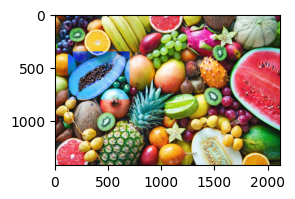

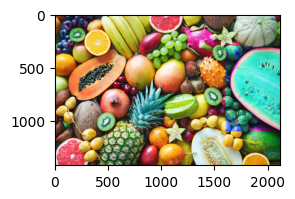

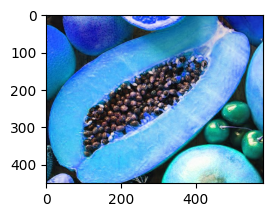

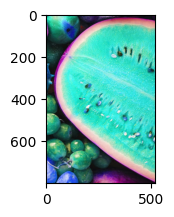

In [15]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from matplotlib import colors

data = iio.imread('Exercise/colorful-ripe-tropical-fruits.jpg')
#[y1:y2 , x1:x2]

def change_hue(region, delta_hue=90):
    region_float = region.astype(float) / 255.0
    hsv = colors.rgb_to_hsv(region_float)
    delta_hue_norm = (delta_hue / 180.0) 
    hsv[..., 0] = (hsv[..., 0] + delta_hue_norm) % 1.0
    rgb_new = colors.hsv_to_rgb(hsv)
    return (rgb_new * 255).astype(np.uint8)

# Tạo bản sao ảnh gốc để đổi màu
img_change1 = data.copy()
img_change2 = data.copy()

# Vùng 1: Papaya
y1a, y2a = 350, 800
x1a, x2a = 120, 700
region1 = img_change1[y1a:y2a, x1a:x2a]
region1_new = change_hue(region1)
img_change1[y1a:y2a, x1a:x2a] = region1_new

# Vùng 2: Watermelon
y1b, y2b = 300, 1100
x1b, x2b = 1600, 2500
region2 = img_change2[y1b:y2b, x1b:x2b]
region2_new = change_hue(region2)
img_change2[y1b:y2b, x1b:x2b] = region2_new

plt.subplot(2, 2, 1)
iio.imsave('output/papaya.jpg', img_change1)
plt.imshow(img_change1)
plt.show()

plt.subplot(2, 2, 2)
iio.imsave('output/watermelon.jpg', img_change2)
plt.imshow(img_change2)
plt.show()

plt.subplot(2, 2, 3)
iio.imsave('output/papaya.jpg', region1_new)
plt.imshow(region1_new)
plt.show()

plt.subplot(2, 2, 4)
iio.imsave('output/watermelon.jpg', region2_new)
plt.imshow(region2_new)
plt.show()

(605, 1021, 3)
(605, 1021, 3)


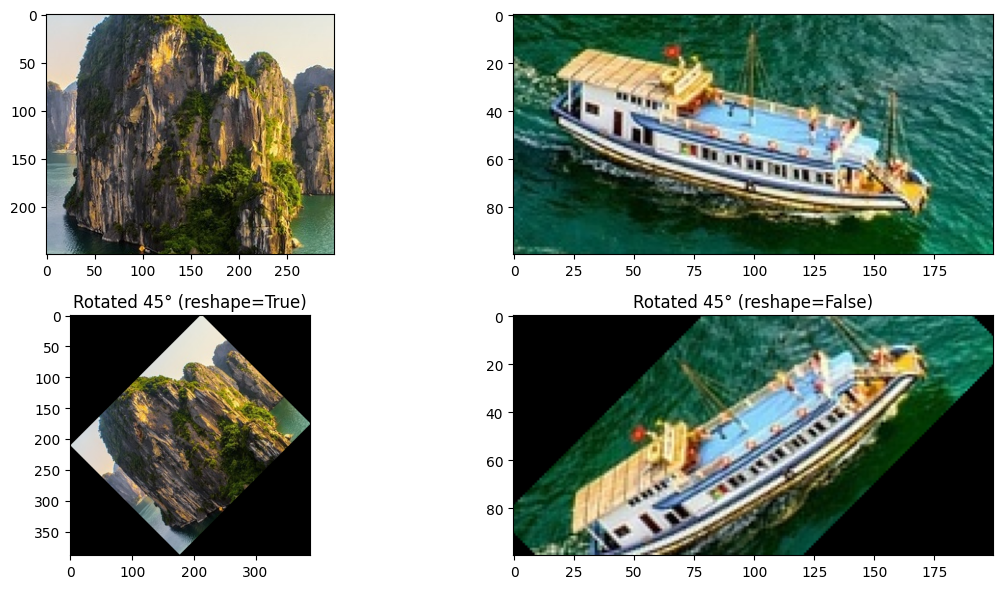

In [1]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import scipy.ndimage as nd

data = iio.imread('Exercise/quang_ninh.jpg')
#[y1:y2 , x1:x2]
bmg1 = data[50:300, 400:700]
print(data.shape)

bmg2 = data[450:550, 480:680]
print(data.shape)

rotated1 = nd.rotate(bmg1, 45)
rotated2 = nd.rotate(bmg2, 45, reshape=False)

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
iio.imsave('output/mountain.jpg', bmg1)
plt.imshow(bmg1)

plt.subplot(2, 2, 2)
iio.imsave('output/boat.jpg', bmg2)
plt.imshow(bmg2)

plt.subplot(2, 2, 3)
plt.imshow(rotated1)
plt.title("Rotated 45° (reshape=True)")

plt.subplot(2, 2, 4)
plt.imshow(rotated2)
plt.title("Rotated 45° (reshape=False)")

plt.tight_layout()
plt.show()

(348, 600, 3)


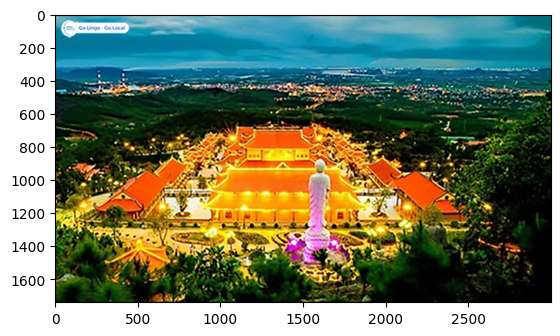

In [56]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import scipy.ndimage as nd 

data = iio.imread('Exercise/pagoda.jpg')
print (data.shape)

phongto = nd.zoom(data, (5, 5, 1))  

iio.imsave('output/phongtochua.jpg', phongto)
plt.imshow(phongto)
plt.show()

Chọn 1 ảnh trong số sau:
1. fruit.jpg
2. pagoda.jpg
3. quang_ninh.jpg
Đã chọn ảnh: pagoda.jpg, kích thước: (348, 600, 3)

Menu thao tác:
T - Tịnh tiến
X - Xoay
P - Phóng to
H - Thu nhỏ
C - Coordinate Map (biến dạng ngẫu nhiên)


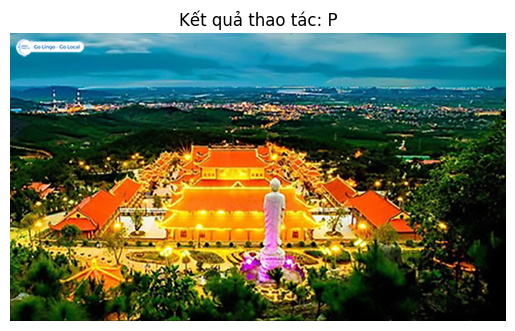

In [60]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import os

image_list = ['fruit.jpg', 'pagoda.jpg', 'quang_ninh.jpg']
print("Chọn 1 ảnh trong số sau:")
for i, name in enumerate(image_list, 1):
    print(f"{i}. {name}")

choice = int(input("Nhập số ảnh (1-3): "))
filename = image_list[choice - 1]
img_path = os.path.join('Exercise', filename)

img = iio.imread(img_path)
print(f"Đã chọn ảnh: {filename}, kích thước: {img.shape}")

print("\nMenu thao tác:")
print("T - Tịnh tiến")
print("X - Xoay")
print("P - Phóng to")
print("H - Thu nhỏ")
print("C - Coordinate Map (biến dạng ngẫu nhiên)")

action = input("Nhập thao tác bạn muốn thực hiện (T/X/P/H/C): ").upper()

result = None

if action == 'T': 
    result = nd.shift(img, shift=(30, 50, 0))  

elif action == 'X': 
    angle = float(input("Nhập góc xoay (độ): "))
    result = nd.rotate(img, angle, reshape=False)

elif action == 'P': 
    scale = float(input("Nhập hệ số phóng to (ví dụ: 2): "))
    result = nd.zoom(img, zoom=(scale, scale, 1))

elif action == 'H': 
    scale = float(input("Nhập hệ số thu nhỏ (ví dụ: 0.5): "))
    result = nd.zoom(img, zoom=(scale, scale, 1))

elif action == 'C': 
    V, H = img.shape[:2]
    M = np.indices((V, H))
    d = 5
    q = 2 * d * np.random.rand(*M.shape) - d
    mp = (M + q).astype(int)
    mp = np.clip(mp, 0, np.array([[V-1], [H-1]])) 
    result = img[mp[0], mp[1]]

else:
    print("❌ Thao tác không hợp lệ.")
    exit()

plt.imshow(result)
plt.title(f"Kết quả thao tác: {action}")
plt.axis('off')
plt.show()
